In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install emoji
# IPAフォントのインストール
!apt-get -y install fonts-ipafont-gothic
# Notoフォントのインストール
!apt-get -y install fonts-noto-cjk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (14.2 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 124788 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont

## データセット読み込み

In [3]:
import pandas as pd
import emoji

# CSVファイルの読み込み
data = pd.read_csv('drive/MyDrive/review/review_ver20250108.csv')
review_label_list = data.values.tolist()


#dataset作成
review_list = []
label_list = [] #onehot
usefull_num = []
label_num = 8 #分類カテゴリ数
each_label_num = {} #各label数のカウント
#each_label_numのvalueを初期化
for i in range(label_num):
  each_label_num[i+1] = 0

for i in range(len(review_label_list)):
  review = emoji.replace_emoji(review_label_list[i][1])
  review_list.append(review)
  usefull_num.append(review_label_list[i][4])

  str_category_list = review_label_list[i][2].split(',')
  try:
    category_list = [int(num) for num in str_category_list]
  except ValueError:
    print(i)
  onehot_label = []
  #空のマルチラベルリスト作成
  for i in range(label_num):
    onehot_label.append(0)
  for category in category_list:
    onehot_label[int(category)-1] = 1
    each_label_num[int(category)] =  each_label_num[int(category)] + 1
  label_list.append(onehot_label)
print(each_label_num)

{1: 659, 2: 99, 3: 171, 4: 264, 5: 25, 6: 26, 7: 22, 8: 6}


## マルチラベル分析用

In [5]:
"""
レビュー分析用
"""

def show_category_to_review(label_list, review_list, category_num):
  """
  各カテゴリーに属するレビューをprintする関数
  label_list : ワンホット表現のラベルリスト [[0,0...0],[0,0,..1]...]
  review_list : レビューリスト　['aaa', 'bbb'...]
  category_num : 探したいカテゴリーナンバー　1〜9
  """
  for i in range(len(label_list)):
    if label_list[i][category_num-1] == 1:
      print(f'ID : {i+1} \n review : {review_list[i]}\n label : {label_list[i]} \n usefull_num : {usefull_num[i]}\n')

show_category_to_review(label_list, review_list, 7)

ID : 48 
 review : 迅速な対応
今回届いた商品は残念ながら片方しか作動がしないという欠陥商品でした。しかしメッセージを送るとすぐに対応していだだき、今新しい商品が届くのを待っている状況です。
片方の作動だけでしたが試してみてとても風も涼しく首にまだ当てていないので音ははっきりは言えませんが、するにはしますがあまり気にならないように感じました
今回欠陥商品でしたがすぐに対応していただき、4日ほどで手元に届くとのことなので星は4でつけました

 label : [1, 0, 0, 0, 0, 1, 1, 0] 
 usefull_num : 3

ID : 59 
 review : 外で使うのが楽しみ
予定より早い配送助かりました。
まだ、外では使用していませんが室内でも起動音はそこまで気になりませんでした。

 label : [1, 0, 0, 0, 0, 0, 1, 0] 
 usefull_num : 1

ID : 86 
 review : 涼しくはあったけど…
注文してからすぐに届いたので助かりました。
畑仕事の時に使う為に購入したのに、涼感プレートは全然冷たく感じないし、暖かい風がくるしでガッカリでした。
家の中での使用は普通に涼しかったので、火を使う台所等では良かったと思いました。
その後、親切丁寧に説明・対応していただき大変良かったです。

 label : [1, 0, 0, 1, 0, 0, 1, 0] 
 usefull_num : 2

ID : 123 
 review : 製品が翌日届き良かったです
10年目に冷凍庫が壊れて早速Amazon検索して決定すると翌日届き良かったです。冷凍庫は欠かせない家庭電化製品なので、とりあえずストックするには良い製品です。

 label : [0, 0, 0, 0, 0, 0, 1, 0] 
 usefull_num : 5

ID : 126 
 review : 良かったです。
思ってたより大きめで良かったです。冷凍も冷蔵もバッチリです！配送も早かったです！

 label : [1, 0, 0, 0, 0, 0, 1, 0] 
 usefull_num : 4

ID : 129 
 review : 購入する際の相性というものがあって、Amazonで買いました
値段相応なので

## シングルラベル分析用

In [5]:
# 辞書で3つのリストとインデックスを管理
data = {
    'id': list(range(len(usefull_num))),
    'reviews': review_list,
    'labels': label_list,
    'usefull_nums': usefull_num,
}

sorted_indices = sorted(range(len(data['usefull_nums'])), key=lambda i: data['usefull_nums'][i], reverse=True)

sorted_data = {key: [value[i] for i in sorted_indices] for key, value in data.items()}

print("Sorted data:")
for key, value in sorted_data.items():
    print(f"{key}: {value}")


Sorted data:
id: [379, 307, 365, 250, 663, 358, 357, 317, 446, 155, 255, 341, 516, 548, 549, 221, 253, 293, 477, 490, 171, 342, 369, 141, 150, 327, 366, 500, 571, 348, 394, 445, 525, 128, 187, 217, 233, 267, 299, 302, 305, 510, 553, 144, 265, 268, 301, 312, 329, 351, 355, 363, 368, 372, 373, 646, 162, 169, 238, 241, 343, 360, 375, 401, 512, 526, 561, 569, 26, 322, 328, 330, 352, 359, 371, 376, 460, 515, 536, 640, 652, 739, 33, 35, 64, 72, 129, 130, 147, 160, 271, 332, 334, 339, 340, 344, 374, 430, 442, 484, 489, 501, 560, 567, 641, 654, 669, 719, 31, 59, 66, 122, 170, 199, 214, 222, 229, 243, 244, 256, 258, 276, 309, 313, 318, 319, 335, 345, 350, 377, 395, 493, 499, 556, 605, 666, 38, 41, 52, 86, 93, 125, 127, 131, 146, 158, 173, 190, 230, 260, 287, 298, 304, 310, 315, 321, 324, 354, 356, 370, 425, 438, 447, 453, 458, 465, 469, 470, 502, 511, 517, 521, 528, 531, 551, 559, 564, 565, 570, 638, 662, 29, 32, 40, 43, 47, 53, 60, 65, 136, 152, 174, 177, 182, 184, 185, 189, 191, 192, 193, 196

In [6]:
def sort_dict_by_key(data, sort_key, reverse=False):
    """
    指定したキーの値に基づいて他のキーのリストも一緒にソートする
    :param data: ソート対象の辞書
    :param sort_key: ソートする基準となるキー（リストの名前）
    :param reverse: Trueなら降順ソート、Falseなら昇順ソート
    :return: ソートされた新しい辞書
    """
    # 指定されたキーの値でインデックスをソート
    sorted_indices = sorted(range(len(data[sort_key])), key=lambda i: data[sort_key][i], reverse=reverse)

    # すべてのリストをそのインデックス順に並び替える
    sorted_data = {key: [value[i] for i in sorted_indices] for key, value in data.items()}
    return sorted_data

def filter_dict_by_key(data, filter_key):
    """
    指定したキーの値が0以上の要素のみをフィルタリングする
    :param data: フィルタ対象の辞書
    :param filter_key: 値が0以上かどうかを確認するキー（リストの名前）
    :return: 0以上の要素のみを持つ新しい辞書
    """
    # 指定したキーのリストから0以上のインデックスを取得
    valid_indices = [i for i, value in enumerate(data[filter_key]) if value >= 1]

    # そのインデックスの要素のみを持つ新しい辞書を作成
    filtered_data = {key: [value[i] for i in valid_indices] for key, value in data.items()}
    return filtered_data



In [7]:
sorted_data = sort_dict_by_key(data, 'usefull_nums', reverse=True)

# 'numbers'が0以上の要素をフィルタリング
filtered_data = filter_dict_by_key(sorted_data, 'usefull_nums')

for key, value in sorted_data.items():
    print(f"{key}: {value}")

print("\nFiltered data:")
for key, value in filtered_data.items():
    print(f"{key}: {value}")

print(len(filtered_data['reviews']))

id: [379, 307, 365, 250, 663, 358, 357, 317, 446, 155, 255, 341, 516, 548, 549, 221, 253, 293, 477, 490, 171, 342, 369, 141, 150, 327, 366, 500, 571, 348, 394, 445, 525, 128, 187, 217, 233, 267, 299, 302, 305, 510, 553, 144, 265, 268, 301, 312, 329, 351, 355, 363, 368, 372, 373, 646, 162, 169, 238, 241, 343, 360, 375, 401, 512, 526, 561, 569, 26, 322, 328, 330, 352, 359, 371, 376, 460, 515, 536, 640, 652, 739, 33, 35, 64, 72, 129, 130, 147, 160, 271, 332, 334, 339, 340, 344, 374, 430, 442, 484, 489, 501, 560, 567, 641, 654, 669, 719, 31, 59, 66, 122, 170, 199, 214, 222, 229, 243, 244, 256, 258, 276, 309, 313, 318, 319, 335, 345, 350, 377, 395, 493, 499, 556, 605, 666, 38, 41, 52, 86, 93, 125, 127, 131, 146, 158, 173, 190, 230, 260, 287, 298, 304, 310, 315, 321, 324, 354, 356, 370, 425, 438, 447, 453, 458, 465, 469, 470, 502, 511, 517, 521, 528, 531, 551, 559, 564, 565, 570, 638, 662, 29, 32, 40, 43, 47, 53, 60, 65, 136, 152, 174, 177, 182, 184, 185, 189, 191, 192, 193, 196, 211, 219, 2

In [8]:
def find_label_indices(data, label_index):
    """
    指定されたラベル（インデックス）が1で、他のラベルが0であるリストのインデックスを返す関数
    :param data: マルチラベルのリスト（ワンホット表現）
    :param label_index: 注目するラベルのインデックス
    :return: 条件を満たすリストのインデックスをリストで返す
    """
    result_indices = []
    for i, labels in enumerate(data):
        if labels[label_index-1] == 1 and all(x == 0 for j, x in enumerate(labels) if j != label_index-1):
            result_indices.append(i)
    return result_indices



In [9]:
def indeices_to_review(review_list, label_list, useful_num, indices):
  return [review_list[i] for i in indices], [label_list[i] for i in indices], [useful_num[i] for i in indices]

In [10]:
# ラベル1が1で他が0のリストのインデックスを取得
label = 7  #1〜8
indices_label1 = find_label_indices(label_list, label)
print(f"Indices where label {label} is 1 and others are 0:", indices_label1)

Indices where label 7 is 1 and others are 0: [122, 645, 708]


In [11]:
multi_class_dict = {}
for label in range(1, 9):
  indices_label = find_label_indices(label_list, label)
  reviews, labels, usefull_nums = indeices_to_review(review_list, label_list, usefull_num, indices_label)
  multi_class_dict[label] = {'id': indices_label,'reviews': reviews, 'labels': labels, 'usefull_nums': usefull_nums}

for label, data in multi_class_dict.items():
  print(f"Label {label}: {len(data['reviews'])} reviews")


Label 1: 284 reviews
Label 2: 4 reviews
Label 3: 11 reviews
Label 4: 35 reviews
Label 5: 25 reviews
Label 6: 7 reviews
Label 7: 3 reviews
Label 8: 6 reviews


## 各ラベルのuseful数を絡めたプロット



In [12]:
import matplotlib.font_manager as fm

# システムにインストールされているすべてのフォントのリストを取得
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Noto' in font:
        print(font)


/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc
/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc
/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc


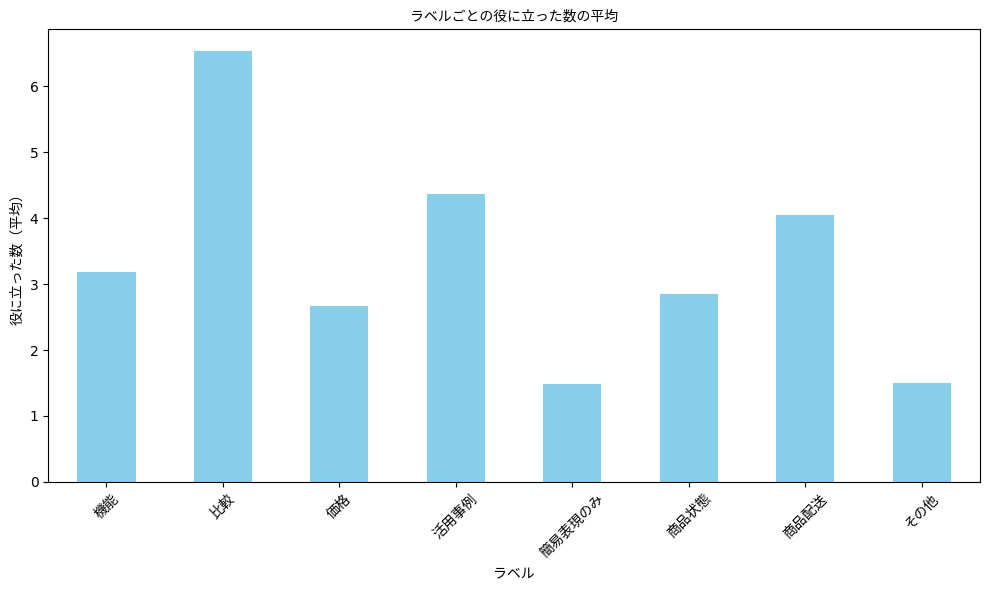

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

id_list = sorted_data['id']  # id
reviews = sorted_data['reviews']  # レビュー
labels = sorted_data['labels']  # ワンホットラベル
useful_nums = sorted_data['usefull_nums'] # 役に立った数

label_names = ['機能', '比較', '価格', '活用事例', '簡易表現のみ', '商品状態', '商品配送', 'その他']

df = pd.DataFrame(labels, columns=label_names)
df['useful_nums'] = useful_nums

# ラベルごとに役に立った数の平均を計算
average_useful_by_label = df[label_names].multiply(df['useful_nums'], axis="index").sum() / df[label_names].sum()


# Notoフォントのパスを取得して設定
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# グラフのプロット
plt.figure(figsize=(10, 6))
average_useful_by_label.plot(kind='bar', color='skyblue')
plt.title('ラベルごとの役に立った数の平均', fontproperties=font_prop)
plt.xlabel('ラベル', fontproperties=font_prop)
plt.ylabel('役に立った数（平均）', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

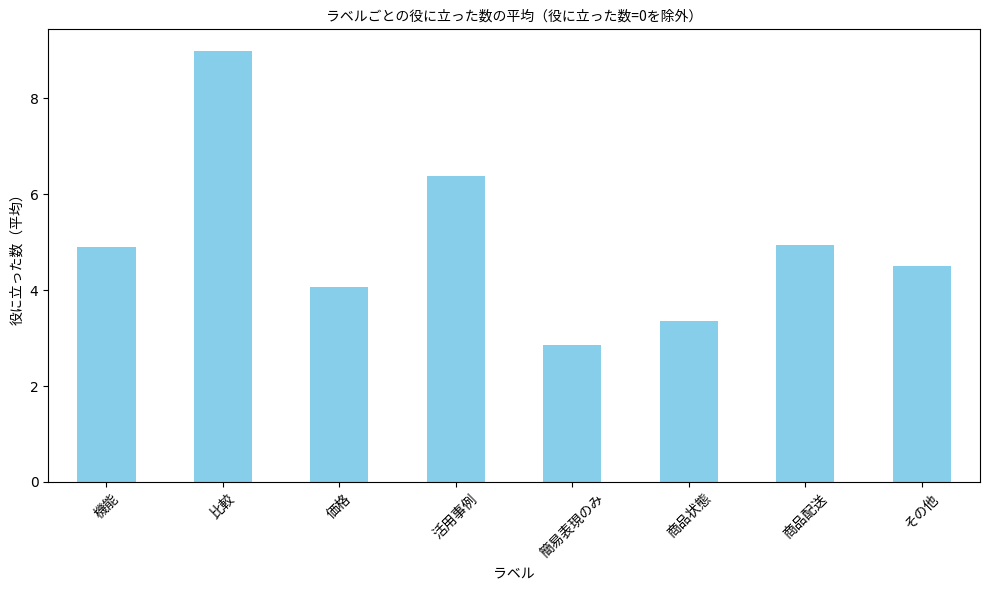

In [14]:
id_list = filtered_data['id']  # id
reviews = filtered_data['reviews']  # レビュー
labels = filtered_data['labels']  # ワンホットラベル
useful_nums = filtered_data['usefull_nums'] # 役に立った数

label_names = ['機能', '比較', '価格', '活用事例', '簡易表現のみ', '商品状態', '商品配送', 'その他']

df = pd.DataFrame(labels, columns=label_names)
df['useful_nums'] = useful_nums

# ラベルごとに役に立った数の平均を計算
average_useful_by_label = df[label_names].multiply(df['useful_nums'], axis="index").sum() / df[label_names].sum()



# Notoフォントのパスを取得して設定
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# グラフのプロット
plt.figure(figsize=(10, 6))
average_useful_by_label.plot(kind='bar', color='skyblue')
plt.title('ラベルごとの役に立った数の平均（役に立った数=0を除外）', fontproperties=font_prop)
plt.xlabel('ラベル', fontproperties=font_prop)
plt.ylabel('役に立った数（平均）', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

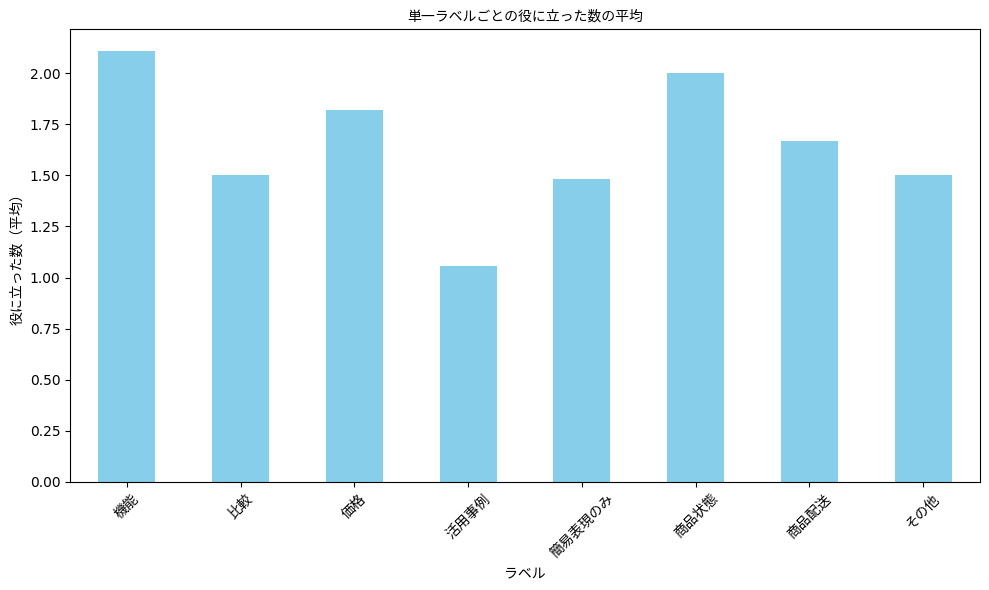

In [15]:
# 単一ラベルが付与されているレビューのusefull_numsのプロット

id_list, reviews, labels, useful_nums = [],[],[],[]
for i in range(1, 9):
  id_list.extend(multi_class_dict[i]['id'])
  reviews.extend(multi_class_dict[i]['reviews'])
  labels.extend(multi_class_dict[i]['labels'])
  useful_nums.extend(multi_class_dict[i]['usefull_nums'])


label_names = ['機能', '比較', '価格', '活用事例', '簡易表現のみ', '商品状態', '商品配送', 'その他']

df = pd.DataFrame(labels, columns=label_names)
df['useful_nums'] = useful_nums

# ラベルごとに役に立った数の平均を計算
average_useful_by_label = df[label_names].multiply(df['useful_nums'], axis="index").sum() / df[label_names].sum()



# Notoフォントのパスを取得して設定
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# グラフのプロット
plt.figure(figsize=(10, 6))
average_useful_by_label.plot(kind='bar', color='skyblue')
plt.title('単一ラベルごとの役に立った数の平均', fontproperties=font_prop)
plt.xlabel('ラベル', fontproperties=font_prop)
plt.ylabel('役に立った数（平均）', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from fon

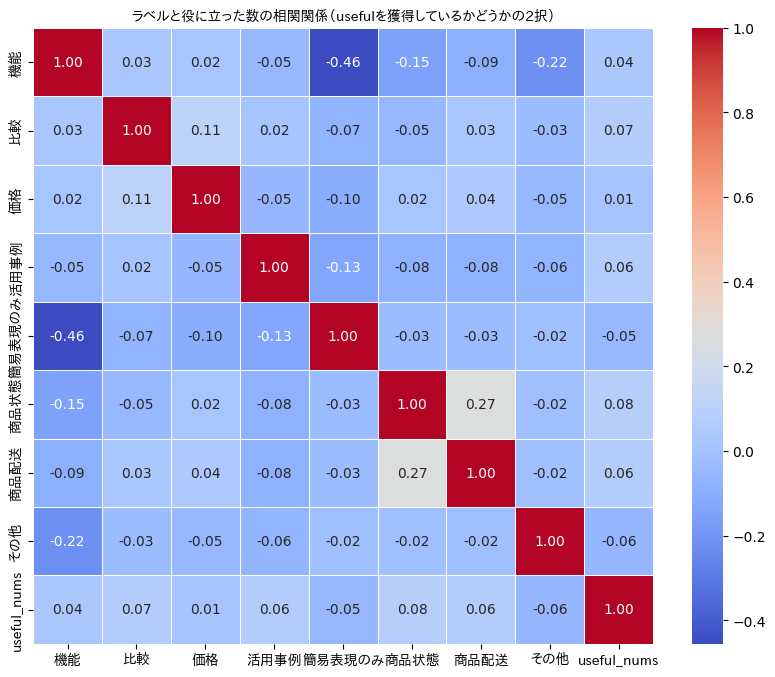

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
"""
id_list = filtered_data['id']  # id
reviews = filtered_data['reviews']  # レビュー
labels = filtered_data['labels']  # ワンホットラベル
useful_nums = filtered_data['usefull_nums'] # 役に立った数
"""
id_list = sorted_data['id']  # id
reviews = sorted_data['reviews']  # レビュー
labels = sorted_data['labels']  # ワンホットラベル
useful_nums = sorted_data['usefull_nums'] # 役に立った数

# IPAフォントを設定
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

label_names = ['機能', '比較', '価格', '活用事例', '簡易表現のみ', '商品状態', '商品配送', 'その他']

df = pd.DataFrame(labels, columns=label_names)
df['useful_nums'] = useful_nums

df['useful_nums'] = df['useful_nums'].apply(lambda x: 1 if x > 0 else 0)
"""
# useful_nums をmin&max
scaler = MinMaxScaler()
df['useful_nums'] = scaler.fit_transform(df[['useful_nums']])
"""
# ラベルと役に立った数の相関関係を計算
correlation_matrix = df.corr()

# ヒートマップのプロット
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('ラベルと役に立った数の相関関係（usefulを獲得しているかどうかの2択）', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()


In [17]:
df

,機能,比較,価格,活用事例,簡易表現のみ,商品状態,商品配送,その他,useful_nums
0,1,1,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1
2,1,1,0,1,0,0,0,0,1
3,1,0,1,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
761,1,0,1,0,0,0,0,0,0
762,1,0,1,1,0,0,0,0,0
763,1,0,1,0,0,0,0,0,0
764,1,0,1,0,0,0,0,0,0


In [18]:
!pip install transformers==4.18.0 fugashi==1.1.0 ipadic==1.0.0 pytorch-lightning==2.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.9/336.9 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 93.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 41.3 MB/s eta 0:00:00
  Created wheel for fugashi: filename=fugashi-1.1.0-cp311-cp311-linux_x86_64.whl size=274675 sha256=0326405b9dcb5d0cf2eff6053b72c4f66386e

In [19]:
from transformers import BertJapaneseTokenizer

MODEL_NAME = 'tohoku-nlp/bert-base-japanese-whole-word-masking'
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)

# トークン数を確認する関数
def check_token_length(review, tokenizer, max_length=256):
    encoding = tokenizer(
        review,
        max_length=max_length,
        padding='do_not_pad',
        truncation=False
    )
    token_length = len(encoding['input_ids'])
    print(f"Text: {review}\nToken Length: {token_length}")
    return token_length

review = "BOWやTOKを期待して購入する人はいないと思います。内容はしっかりと２Dゼルダで新たな謎解きが楽しいです。２Dならではの「縛り」、（例えばベッドを積み上げないと階段のように上っていけない場合、ベッドの向きは必ずリンクの向いている方向に縦長に出現する）などがあり、ゆっくり謎解きを楽しむ為、敵の動きが遅いなどかなり調整がなされています。場面によってはおそらく解法は複数ある場合もあり、いろいろ試せます。ボス戦ではリンクに変身して剣で切りまくることもできます。自分で戦いたい、というプレイヤーもいるでしょう。あらゆるゼルダファンの期待に応えたいという開発者の意気込みを感じられます。PS５のようなハイスペックなゲーム機でなくとも面白いゲームは出来る、というお手本のようなゲームです。迷っている人はぜひ購入してもらいたいです。可愛い画面はお子様向けの印象ですが内容は大人が楽しむ謎解きです。敢えて気になった点を挙げるとすれば体力回復にはスムージーや薬の他、カリモノのベッドもあり、パワーアップアイテムやミニゲームの特典の重要度が低い、カラクリが故障すると修理に結構なルピーが必要、ということでしょうか。エンディングで台詞がなく、王様やリンクの会話内容がわからずモヤモヤします。とはいえ総合的にとても良質なゲームでした。第2弾があれば購入したいです。36人のお客様がこれが役に立ったと考えています"
token_length = check_token_length(review, tokenizer)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/258k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

ModuleNotFoundError: You need to install fugashi to use MecabTokenizer. See https://pypi.org/project/fugashi/ for installation.

## 分類結果の詳細分析

In [ ]:
import pandas as pd
import os
import ast
def find_misclassified_samples_from_csv(csv_file_path, target_label_index):
    """
    CSV ファイルを読み込み、指定されたターゲットラベルに対する正解ラベルと予測ラベルを比較し、間違っているレビューを出力する関数。

    Args:
        csv_file_path (str): 読み込む CSV ファイルのパス。
        target_label_index (int): 比較対象のターゲットラベルのインデックス（1 ベース）。

    Returns:
        None
    """
    df = pd.read_csv(csv_file_path)

    # ラベル範囲チェック
    if not (1 <= target_label_index <= 8):
        print("ラベル範囲外です")
        return

    misclassified_samples = []

    for index, row in df.iterrows():
        true_labels = ast.literal_eval(row['true_labels'])
        predicted_labels = ast.literal_eval(row['predicted_labels'])

        # ターゲットラベルがリストの範囲内であることを確認
        if target_label_index - 1 < len(true_labels):
            true_label = true_labels[target_label_index - 1]
            predicted_label = predicted_labels[target_label_index - 1]

            # 正解と予測が一致しない場合
            if true_label != predicted_label:
                misclassified_samples.append({
                    'review_text': row['review_text'],
                    'true_labels': true_labels,
                    'predicted_labels': predicted_labels
                })

    if misclassified_samples:
        print(f" 誤分類 : {len(misclassified_samples)}")
        for sample in misclassified_samples:
            print(f"レビュー: {sample['review_text']}")
            print(f"正解ラベル: {sample['true_labels']}, 予測ラベル: {sample['predicted_labels']}")
            print("---")
    else:
        print("誤分類 : 0")



In [ ]:
file_path = 'drive/MyDrive/test_result/cross_validation_3.csv'
find_misclassified_samples_from_csv(file_path, target_label_index=6)

In [ ]:
import ast

def find_correctly_classified_positive_samples_from_csv(csv_file_path, target_label_index):
    """
    CSV ファイルを読み込み、指定されたターゲットラベルに対する予測ラベルが1で正解しているレビューを出力する関数。

    Args:
        csv_file_path (str): 読み込む CSV ファイルのパス。
        target_label_index (int): 比較対象のターゲットラベルのインデックス（1 ベース）。

    Returns:
        None
    """
    df = pd.read_csv(csv_file_path)

    # ラベル範囲チェック
    if not (1 <= target_label_index <= 8):
        print("ラベル範囲外です")
        return

    correctly_classified_positive_samples = []

    for index, row in df.iterrows():
        true_labels = ast.literal_eval(row['true_labels'])
        predicted_labels = ast.literal_eval(row['predicted_labels'])

        # ターゲットラベルがリストの範囲内であることを確認
        if target_label_index - 1 < len(true_labels):
            true_label = true_labels[target_label_index - 1]
            predicted_label = predicted_labels[target_label_index - 1]

            # 予測ラベルが1で、正解ラベルと一致する場合
            if predicted_label == 1 and true_label == predicted_label:
                correctly_classified_positive_samples.append({
                    'review_text': row['review_text'],
                    'true_labels': true_labels,
                    'predicted_labels': predicted_labels
                })

    if correctly_classified_positive_samples:
        print(f"予測ラベル1 正分類 : {len(correctly_classified_positive_samples)}")
        for sample in correctly_classified_positive_samples:
            print(f"レビュー: {sample['review_text']}")
            print(f"正解ラベル: {sample['true_labels']}, 予測ラベル: {sample['predicted_labels']}")
            print("---")
    else:
        print("正分類 : 0")



In [ ]:
file_path = 'drive/MyDrive/test_result/cross_validation_3.csv'
find_correctly_classified_positive_samples_from_csv(file_path, target_label_index=6)